<a href="https://colab.research.google.com/github/Gayatri8-sys/Machine-Learning/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/exchange_rate.csv', parse_dates=['date'], index_col='date')
df = df.sort_index()
df.head()


,Ex_rate
date,
01-01-1990 00:00,0.7855
01-01-1991 00:00,0.7645
01-01-1992 00:00,0.6720
01-01-1993 00:00,0.7403
01-01-1994 00:00,0.7350


In [ ]:
df

,Ex_rate
date,
01-01-1990 00:00,0.785500
01-01-1991 00:00,0.764500
01-01-1992 00:00,0.672000
01-01-1993 00:00,0.740300
01-01-1994 00:00,0.735000
...,...
31-12-2005 00:00,1.030758
31-12-2006 00:00,1.030641
31-12-2007 00:00,0.909132


In [ ]:
df.isnull().sum()  # Check for missing data

,0
Ex_rate,0


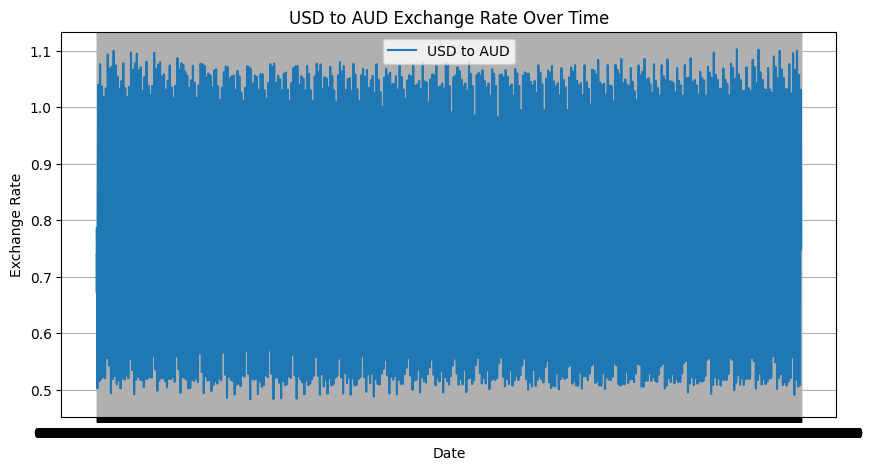

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df['Ex_rate'], label='USD to AUD')
plt.title("USD to AUD Exchange Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.grid()
plt.show()


## ARIMA Model


Plot ACF and PACF

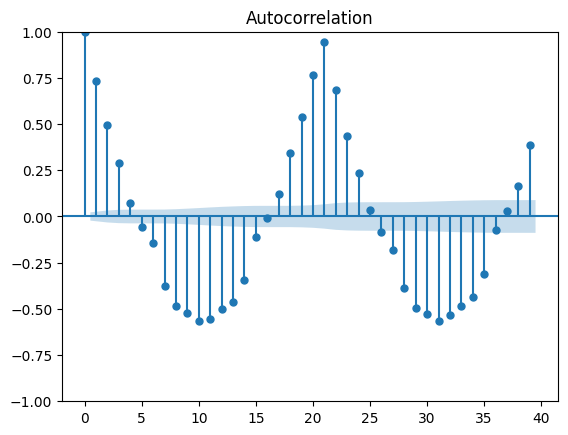

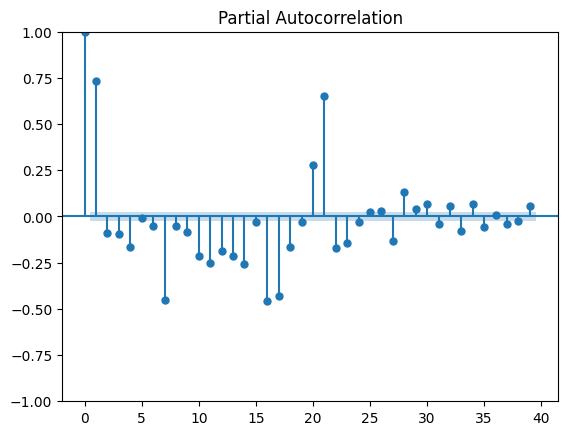

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Ex_rate'])
plot_pacf(df['Ex_rate'])
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model_arima = ARIMA(df['Ex_rate'], order=(1,1,1))  # You can adjust (p,d,q)
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood                7260.779
Date:                Wed, 23 Jul 2025   AIC                         -14515.559
Time:                        11:01:08   BIC                         -14494.756
Sample:                             0   HQIC                        -14508.420
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7335      0.009     79.741      0.000       0.715       0.751
ma.L1         -1.0000      0.155     -6.465      0.000      -1.303      -0.697
sigma2         0.0086      0.001      6.417      0.0

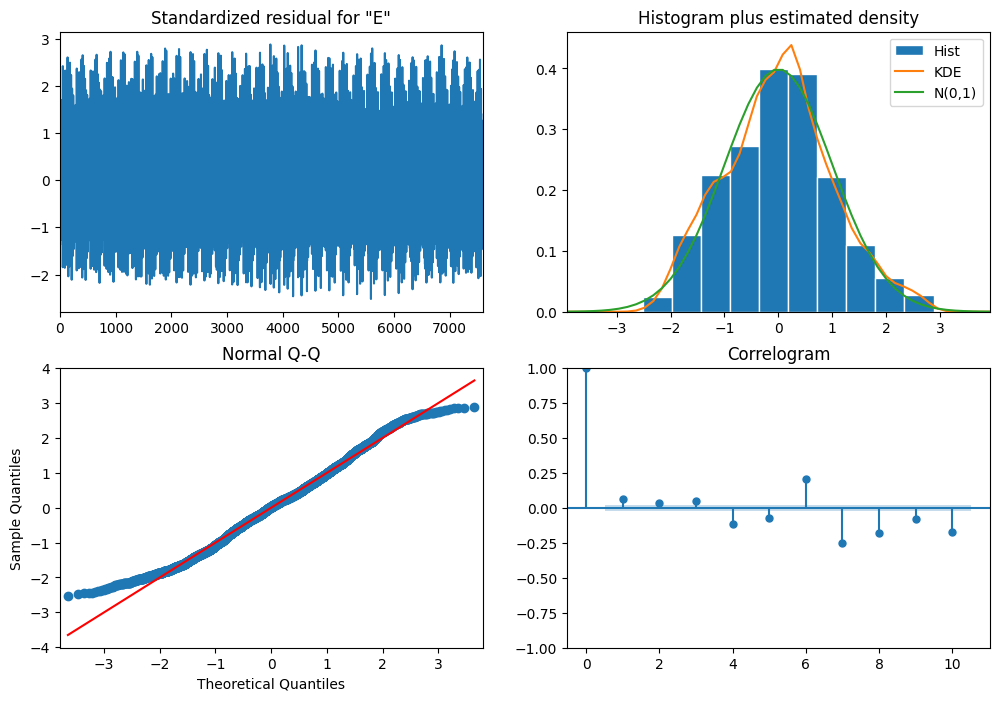

In [ ]:
model_arima_fit.plot_diagnostics(figsize=(12, 8))
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


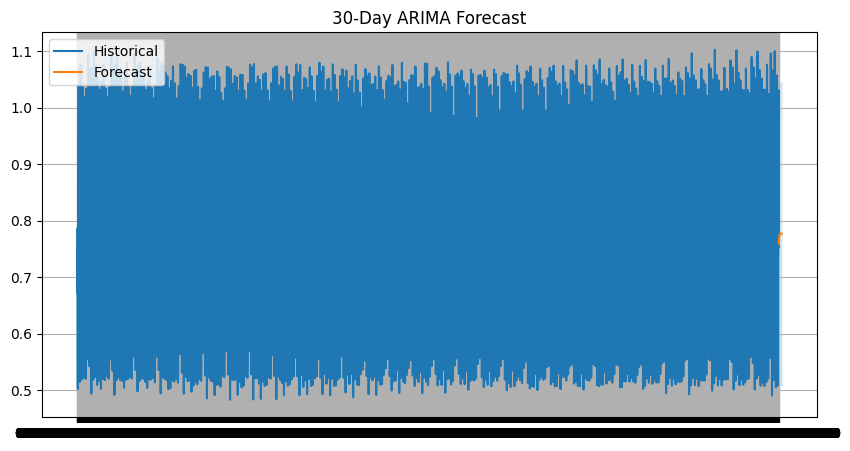

In [ ]:
forecast_arima = model_arima_fit.get_forecast(steps=30)
forecast_mean = forecast_arima.predicted_mean
forecast_ci = forecast_arima.conf_int()

# Plot forecast
plt.figure(figsize=(10, 5))
plt.plot(df['Ex_rate'], label='Historical')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='lightblue', alpha=0.4)
plt.title("30-Day ARIMA Forecast")
plt.legend()
plt.grid()
plt.show()

# Exponential Smoothing

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_es = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal=None)
model_es_fit = model_es.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


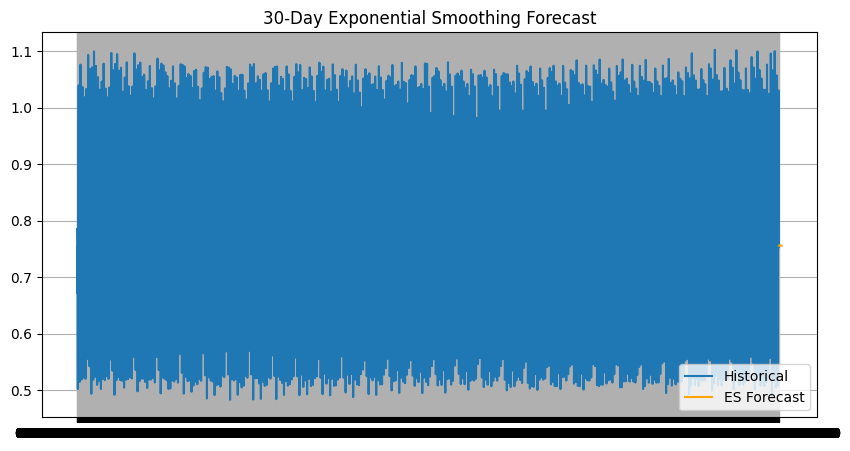

In [ ]:
forecast_es = model_es_fit.forecast(30)

plt.figure(figsize=(10, 5))
plt.plot(df['Ex_rate'], label='Historical')
plt.plot(forecast_es.index, forecast_es, label='ES Forecast', color='orange')
plt.title("30-Day Exponential Smoothing Forecast")
plt.legend()
plt.grid()
plt.show()

# Evaluation

In [ ]:
train = df['Ex_rate'][:-30]
test = df['Ex_rate'][-30:]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Forecasts on test period
arima_preds = model_arima_fit.forecast(steps=30)
es_preds = model_es_fit.forecast(30)

# Evaluate
mae_arima = mean_absolute_error(test, arima_preds)
rmse_arima = mean_squared_error(test, arima_preds)

mae_es = mean_absolute_error(test, es_preds)
rmse_es = mean_squared_error(test, es_preds)

print(f"ARIMA -> MAE: {mae_arima:.4f}, RMSE: {rmse_arima:.4f}")
print(f"ES    -> MAE: {mae_es:.4f}, RMSE: {rmse_es:.4f}")


ARIMA -> MAE: 0.1141, RMSE: 0.0211
ES    -> MAE: 0.1158, RMSE: 0.0228


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
